<a href="https://colab.research.google.com/github/ldtownsend/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/LS_DS7_113_Making_Data_backed_Assertions_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science - Making Data-backed Assertions

This is, for many, the main point of data science - to create and support reasoned arguments based on evidence. It's not a topic to master in a day, but it is worth some focused time thinking about and structuring your approach to it.

## Assignment - what's going on here?

Consider the data in `persons.csv` (already prepared for you, in the repo for the week). It has four columns - a unique id, followed by age (in years), weight (in lbs), and exercise time (in minutes/week) of 1200 (hypothetical) people.

Try to figure out which variables are possibly related to each other, and which may be confounding relationships.

Try and isolate the main relationships and then communicate them using crosstabs and graphs. Share any cool graphs that you make with the rest of the class in Slack!

In [0]:
# !pip install pandas==0.23.4 # You'll probably need to run this once and restart the runtime before proceeding.

In [0]:
import pandas as pd
persons_data_url = 'https://raw.githubusercontent.com/ldtownsend/DS-Unit-1-Sprint-1-Dealing-With-Data/master/module3-databackedassertions/persons.csv'

In [0]:
persons_data = pd.read_csv(persons_data_url)

In [4]:
for col in persons_data.columns:
  print(col)

Unnamed: 0
age
weight
exercise_time


In [0]:
persons_data.columns= ['ID', 'age', 'weight', 'exercise_time'] # Wasn't sure at first if we'd need to keep the ID separate for any reason. So I added a heading, spoiler: it didn't matter.

In [6]:
persons_data.head()

,ID,age,weight,exercise_time
0,0,44,118,192
1,1,41,161,35
2,2,46,128,220
3,3,39,216,57
4,4,28,116,182


In [7]:
pd.crosstab(persons_data['age'], persons_data['exercise_time']) # It 'worked', but this wasn't particularly useful given the basically-continuous nature of both the age and exercise time variables, so we need bins...

exercise_time,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,30,31,32,33,34,35,36,37,38,39,40,...,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,296,297,298,299,300
age,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
18,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
24,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
25,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


##Exploratory Scatter Plots
I wanted to look at a few relationships between variables that I thought of as intuitive. 

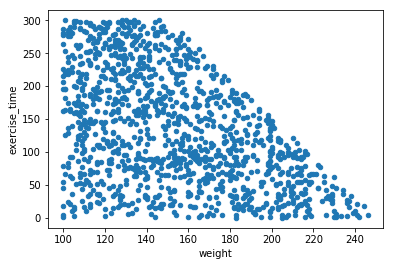

In [8]:
#Weight vs Exercise Time
persons_data.plot.scatter('weight', 'exercise_time'); 

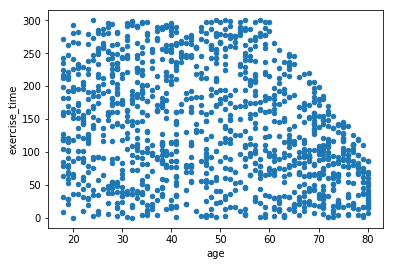

In [9]:
#Age vs Exercise Time
persons_data.plot.scatter('age', 'exercise_time');

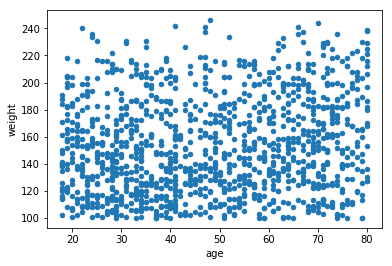

In [10]:
#Age vs Weight - no obvious relationship...
persons_data.plot.scatter('age', 'weight');

In [11]:
#I tried putting the three variable in a range of bin sizes, I left these where they are now to make the crosstabs below a bit more readable.
exercise_time_bins = pd.cut(persons_data['exercise_time'], 5) 
weight_bins = pd.cut(persons_data['weight'],10)
age_bins = pd.cut(persons_data['age'],5)

ct = pd.crosstab(weight_bins, [age_bins, exercise_time_bins])
ct

age             (17.938, 30.4]      ...         (67.6, 80.0]
exercise_time     (-0.3, 60.0]      ...       (180.0, 240.0]
weight                              ...                     
(99.854, 114.6]              4      ...                    3
(114.6, 129.2]               6      ...                    2
(129.2, 143.8]               4      ...                    3
(143.8, 158.4]               3      ...                    1
(158.4, 173.0]               5      ...                    0
(173.0, 187.6]               6      ...                    0
(187.6, 202.2]               7      ...                    0
(202.2, 216.8]              10      ...                    0
(216.8, 231.4]               4      ...                    0
(231.4, 246.0]               3      ...                    0

[10 rows x 24 columns]

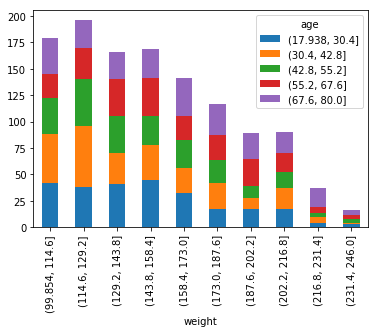

In [12]:
ct_weight_vs_age = pd.crosstab(weight_bins, age_bins)
ct_weight_vs_age.plot(kind='bar', stacked=True);

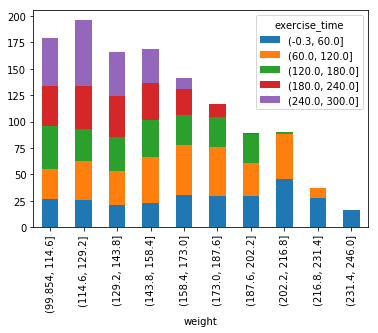

In [13]:
ct_weight_vs_ex_time = pd.crosstab(weight_bins, exercise_time_bins)
ct_weight_vs_ex_time.plot(kind='bar', stacked=True);

### Assignment questions

After you've worked on some code, answer the following questions in this text block:

1.  What are the variable types in the data?
  - The ages, weights, and exercise times are all effectively continuous.
2.  What are the relationships between the variables?
  - Exercise time and weight tend to be inversely related.
  - Exercise time and age tend to be inversely related.
3.  Which relationships are "real", and which spurious?
  - The relationship between exercise time - weight relationship is real, as is the relationship between age & exercise time, but the relationship between age and weight is spurious.
  

## Stretch goals and resources

Following are *optional* things for you to take a look at. Focus on the above assignment first, and make sure to commit and push your changes to GitHub.

- [Spurious Correlations](http://tylervigen.com/spurious-correlations)
- [NIH on controlling for confounding variables](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4017459/)

Stretch goals:

- Produce your own plot inspired by the Spurious Correlation visualizations (and consider writing a blog post about it - both the content and how you made it)
- Pick one of the techniques that NIH highlights for confounding variables - we'll be going into many of them later, but see if you can find which Python modules may help (hint - check scikit-learn)